In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import decomposition
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import TSNE
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from sklearn import metrics
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal as mvn

<h1> Using PCA to compress data (Example: New York) 

In [3]:
ny = pd.read_csv('zipcode_level_data/ny_model_final.csv')

X= ny.drop(columns='zipcode')
X=X.fillna(0)

In [4]:
X_norm = preprocessing.scale(X)
pca = decomposition.PCA(n_components=34)
X_centered = X_norm - X_norm.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

<h3> intial variance 

In [5]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
#     print(" + ".join("%.3f x %s" % (value, name)
#                      for value, name in zip(component,
#                                             X.columns)))
    print(pd.DataFrame(zip(component,X.columns)).sort_values(by=0,ascending=False))

1 component: 32.93% of initial variance
           0                                                  1
31  0.284824                         Renter_Occupied_Households
14  0.279791                                     youth_20_to_39
28  0.277050                                      num_of_2b_apt
12  0.265364                                   total_population
29  0.253123                                 num_of_3plus_b_apt
27  0.246377                                      num_of_1b_apt
22  0.242580                                crimes_in_half_year
9   0.241374                                      num_of_market
13  0.235137                                    num_of_children
5   0.208262                                         num_of_bus
26  0.192737                                  num_of_studio_apt
6   0.185799                                         num_of_sub
17  0.184154                  American_Indian_Or_Alaskan_Native
19  0.178017           household_income_less_than_25000_percent


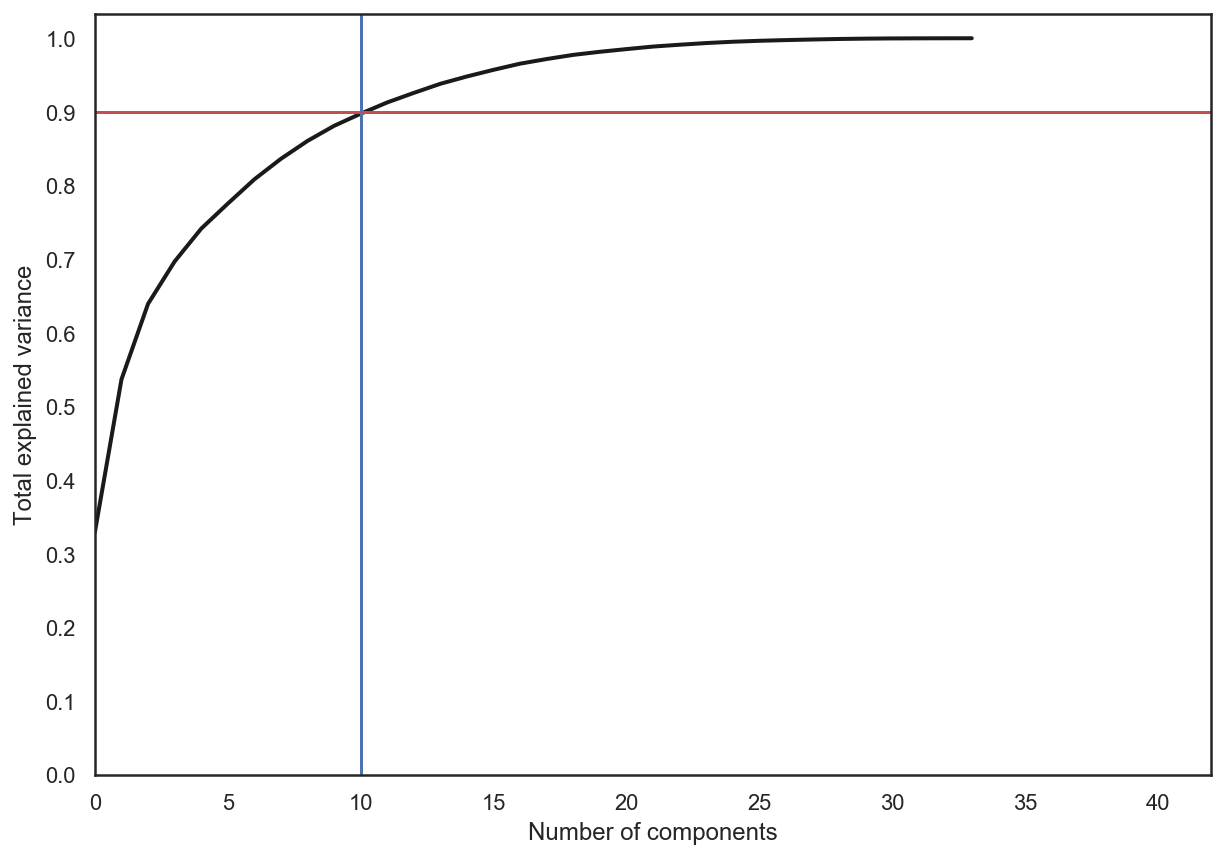

In [6]:
pca = decomposition.PCA().fit(X_centered)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 42)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(10, c='b')
plt.axhline(0.9, c='r')
plt.show();

* 2 components can represent about 50% information of X
* 10 components can represent about 90% information of X

<h4> 2 components for pca

In [7]:
y= X.num_of_airbnb

Projecting 2-dimensional data to 2D


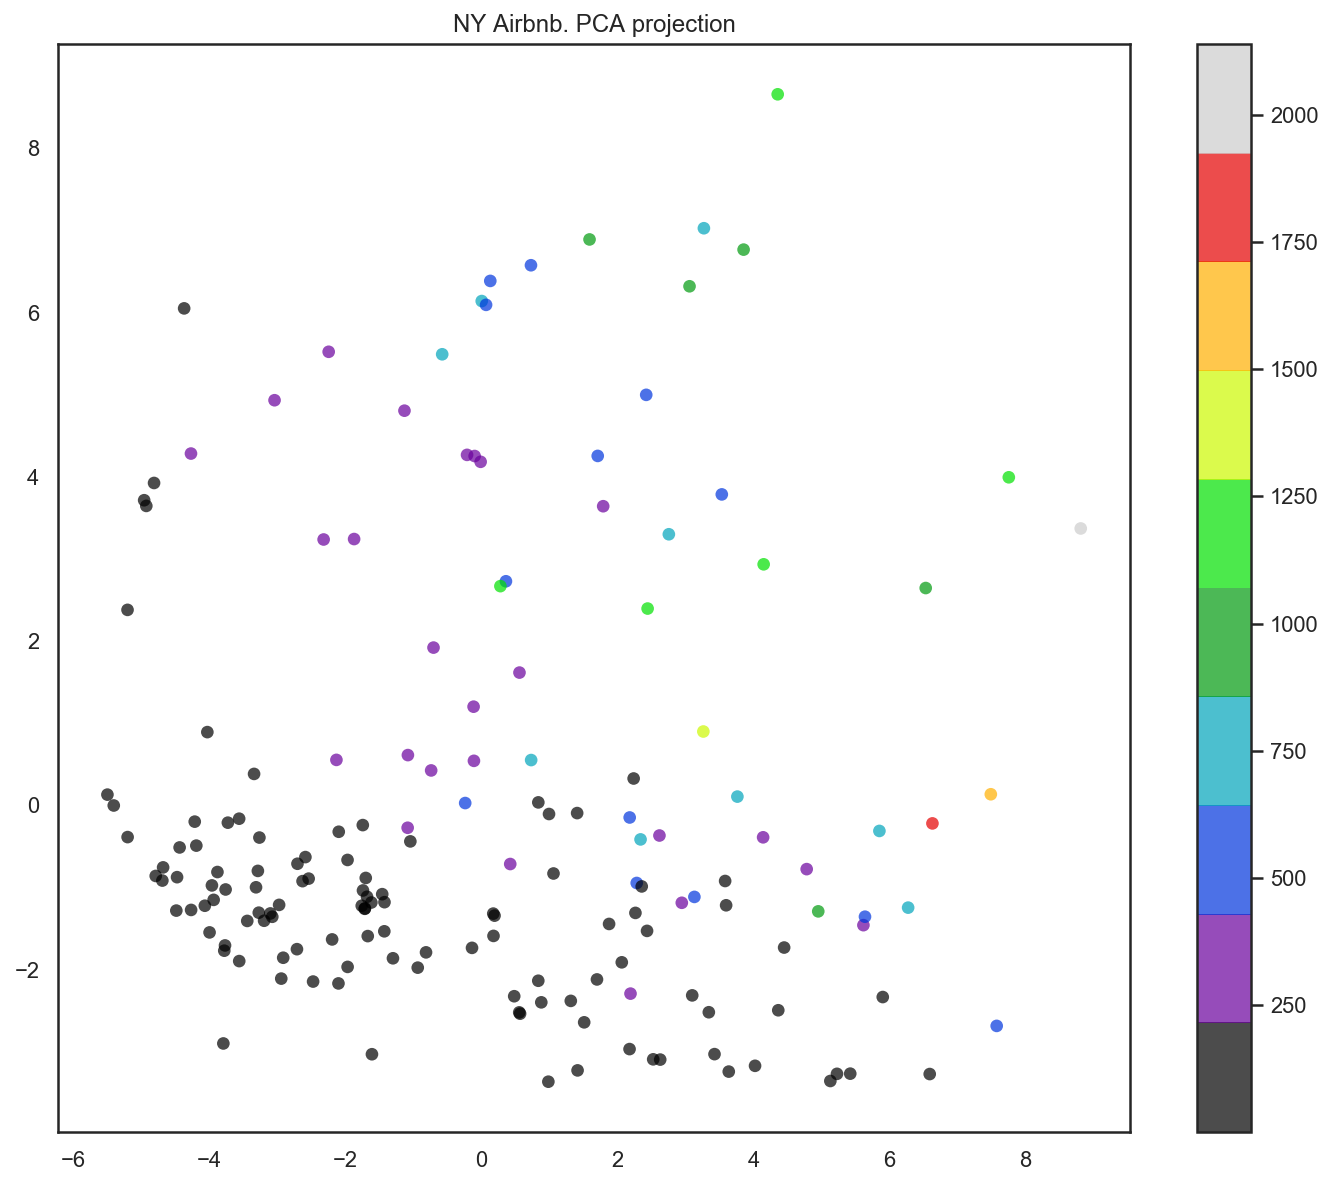

In [8]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X_centered)

print('Projecting %d-dimensional data to 2D' % X_reduced.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('NY Airbnb. PCA projection');

<h4> 10 componnets for pca

Projecting 10-dimensional data to 2D


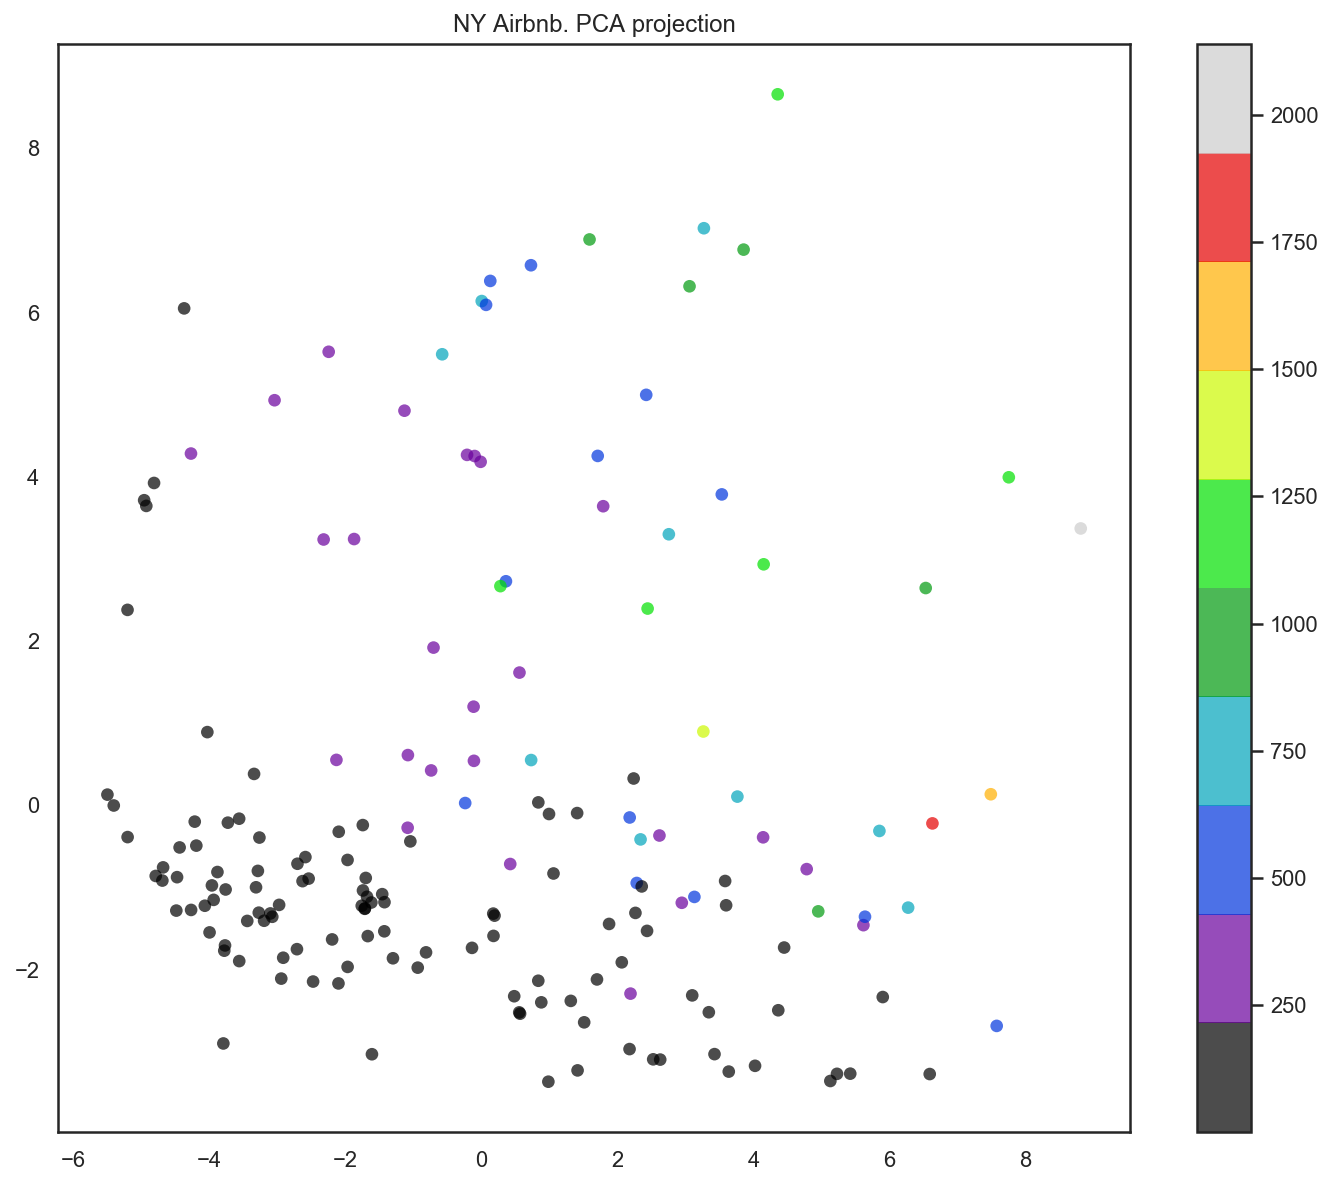

In [9]:
pca = decomposition.PCA(n_components=10)
X_reduced2 = pca.fit_transform(X_centered)

print('Projecting %d-dimensional data to 2D' % X_reduced2.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('NY Airbnb. PCA projection');

<h4> TSNE

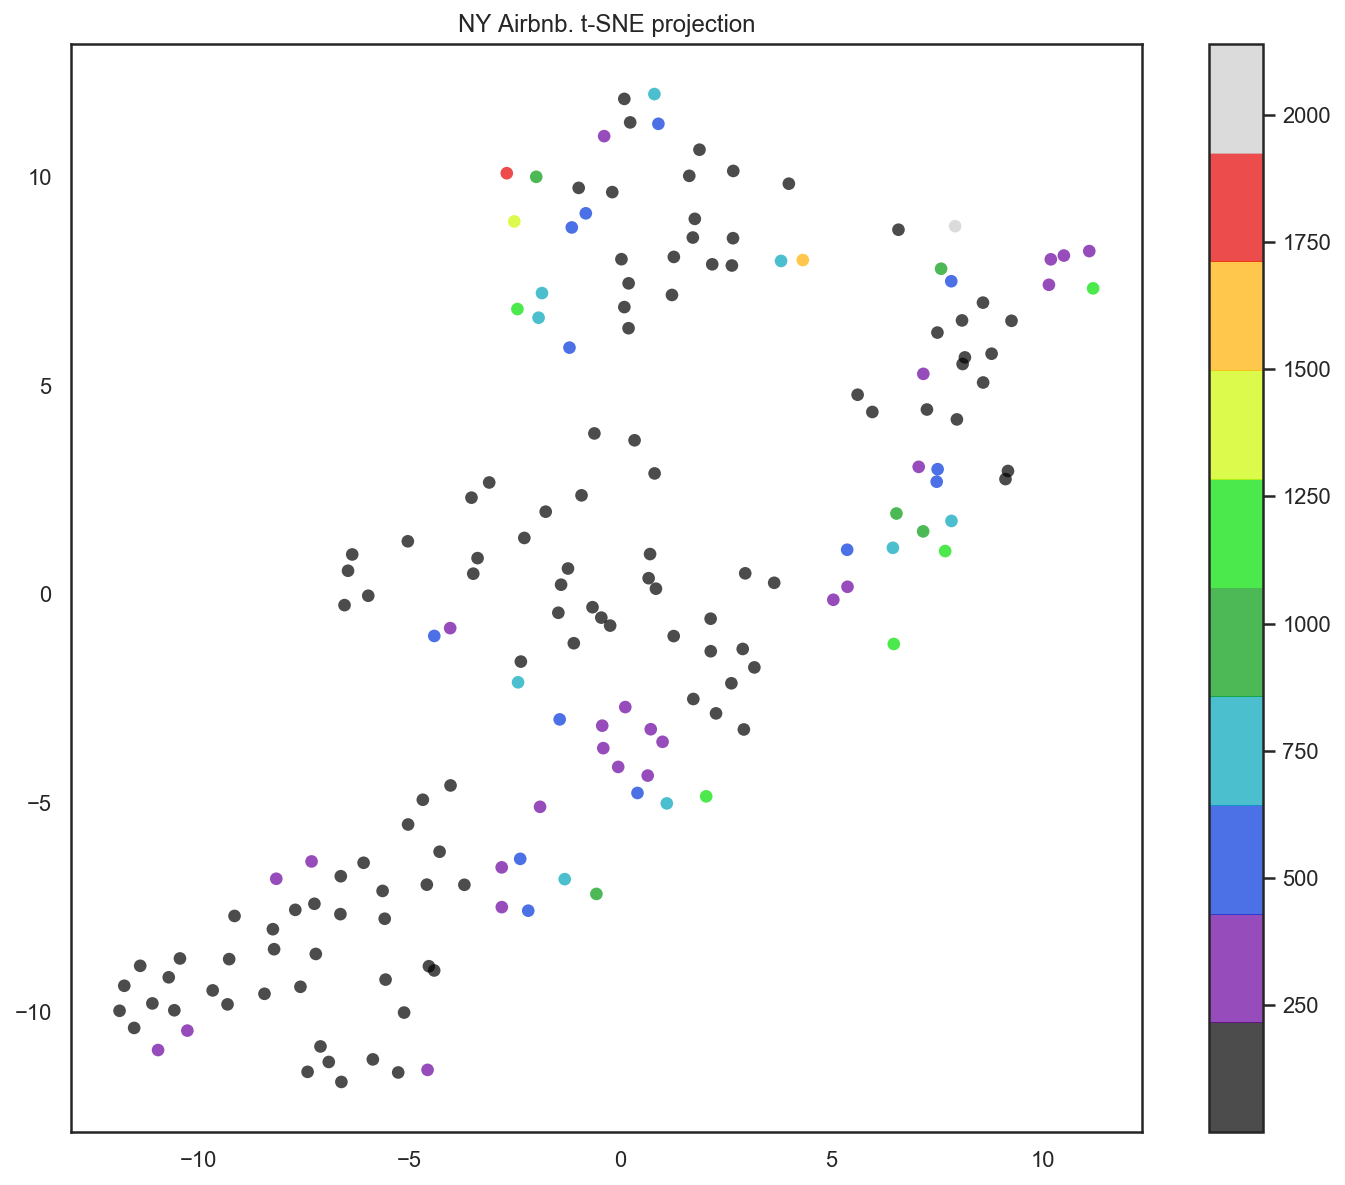

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('NY Airbnb. t-SNE projection');

<h1> Clustering
 

<h3> K-means

<h4> using pca compressed data(10 components)

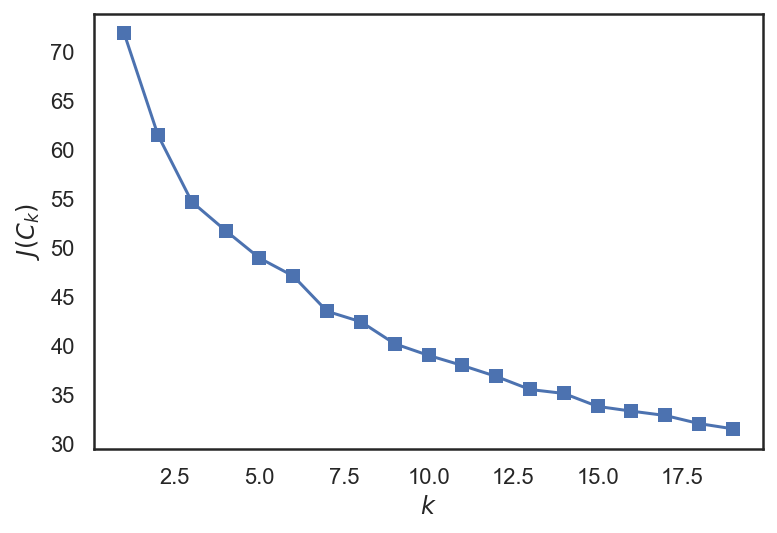

In [11]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_reduced2)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 20), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

* J decrease significantly when k = 5

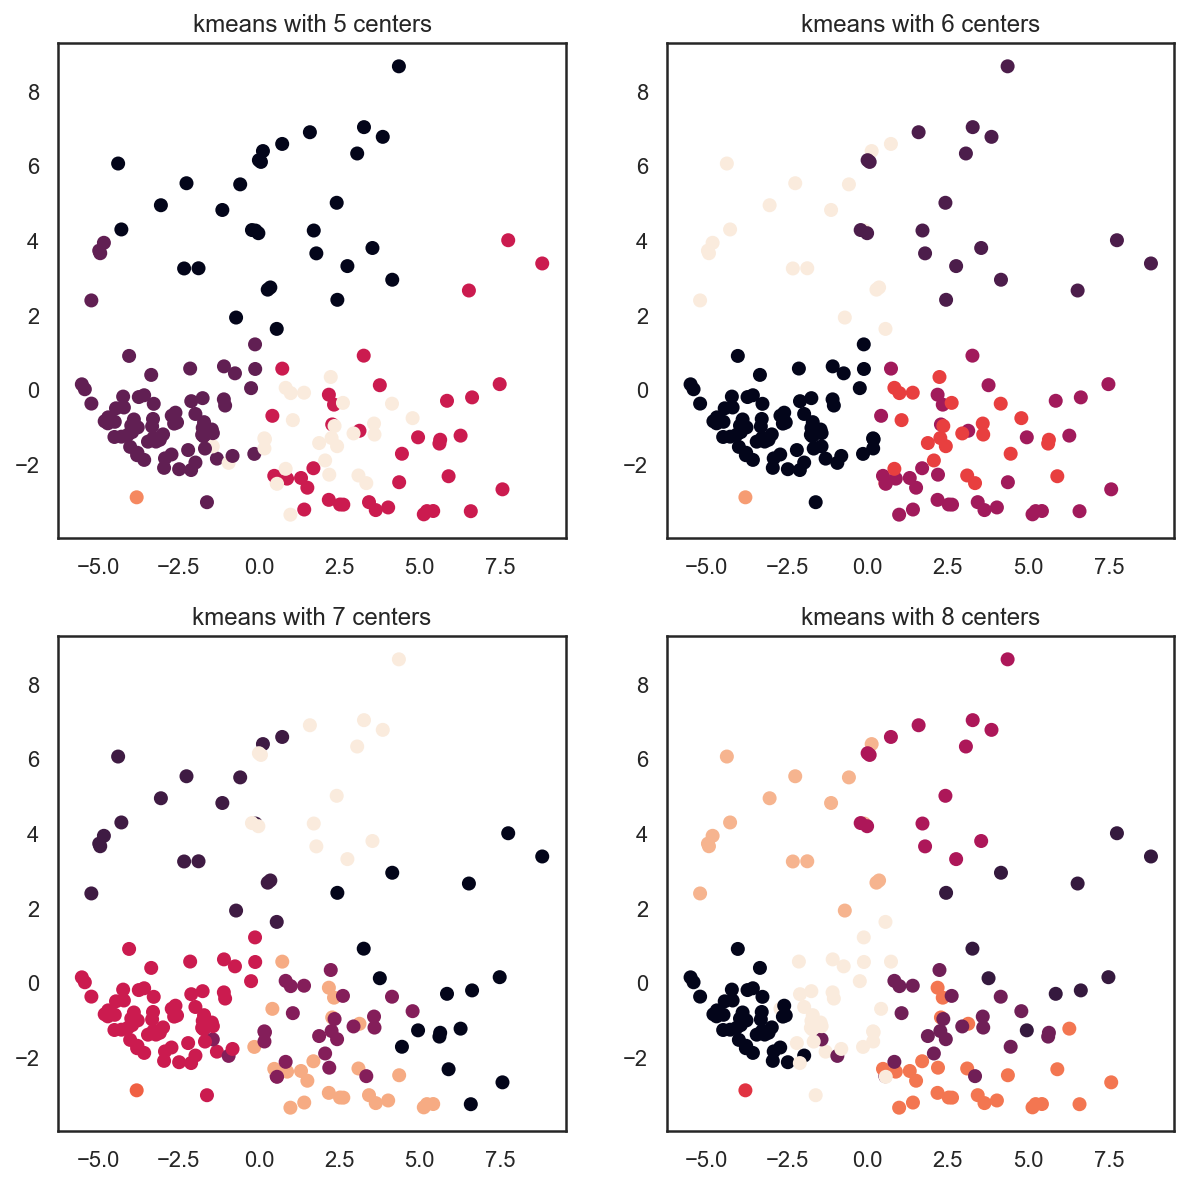

In [12]:
fig, axes = plt.subplots(2, 2,figsize=(10,10))
for i in range(5,9):
    y_pred= KMeans(n_clusters=i, random_state=170,max_iter=2000).fit_predict(X_reduced2)
    
    ax = axes[int((i-5)/2), (i-5)%2]
    #ny_train[col].plot(kind='hist', ax=ax)
    ax.set_title(f'kmeans with {i} centers')  
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred)
    #plt.title(f'kmeans with {i} centers')
plt.show()

<h5> visualize with tsne

In [13]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_norm)
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 172 samples in 0.000s...
[t-SNE] Computed neighbors for 172 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 172 / 172
[t-SNE] Mean sigma: 2.545010
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.362534
[t-SNE] KL divergence after 300 iterations: 0.487635


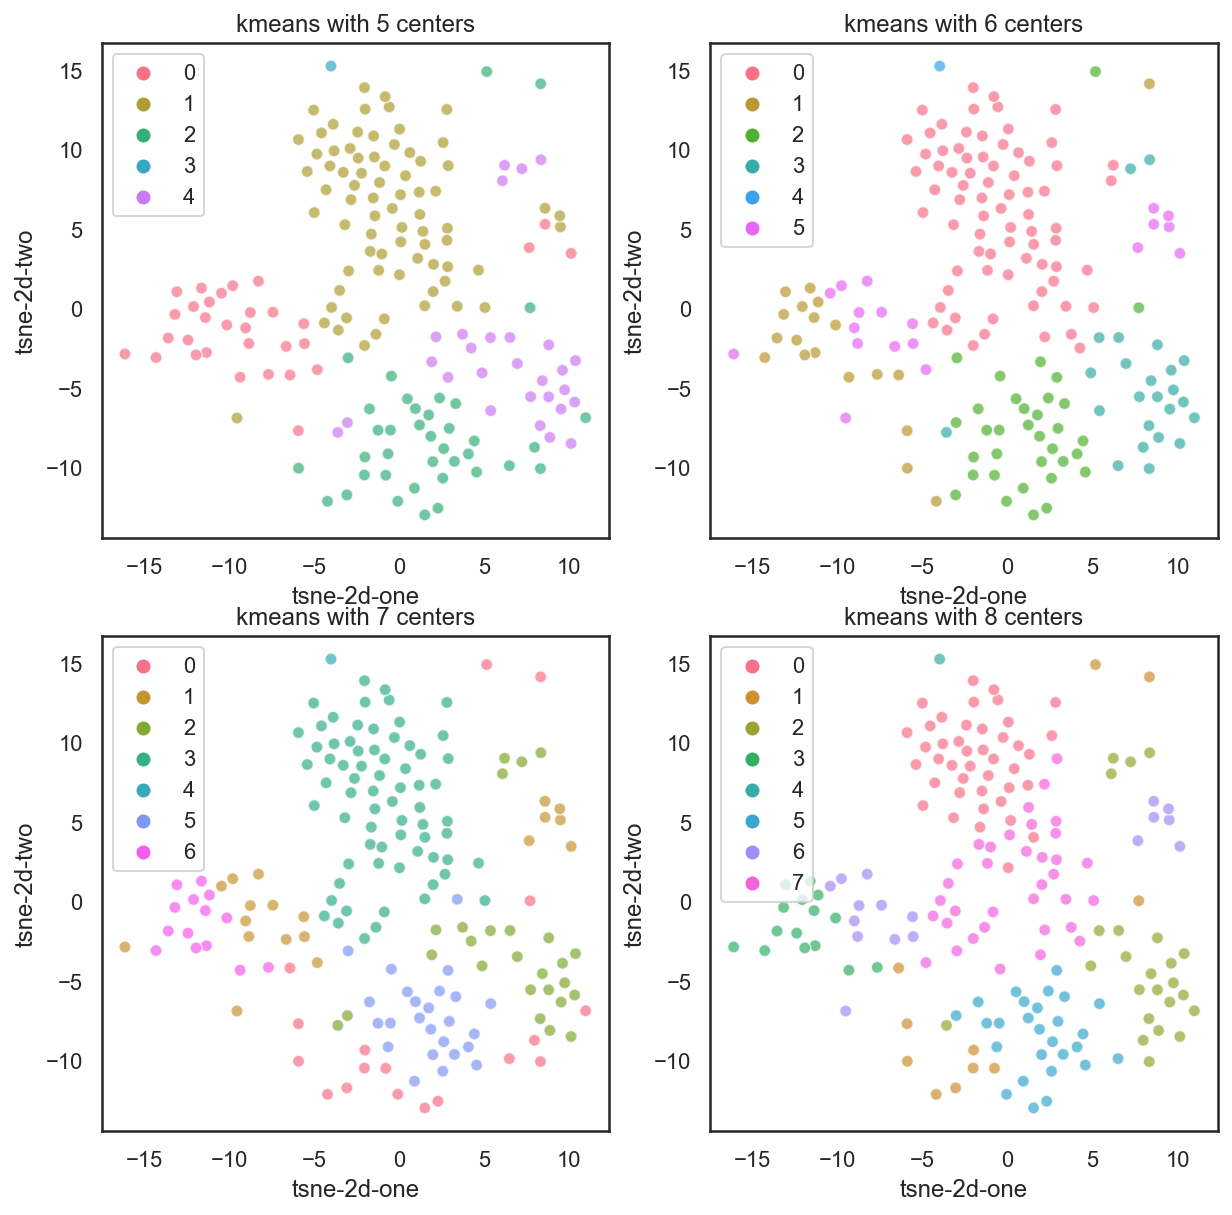

In [14]:
fig, axes = plt.subplots(2, 2,figsize=(10,10))
for i in range(5,9):
    y_pred= KMeans(n_clusters=i, random_state=170,max_iter=2000).fit_predict(X_reduced2)
    
    ax = axes[int((i-5)/2), (i-5)%2]
    #ny_train[col].plot(kind='hist', ax=ax)
    ax.set_title(f'kmeans with {i} centers')  
    sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue=y_pred,palette=sns.color_palette("husl",i),
                   data = df_subset,legend='full',alpha=0.7,ax=ax)
    #plt.title(f'kmeans with {i} centers')
plt.show()

* 6 centers is better

<h4> Use standardized data without pca

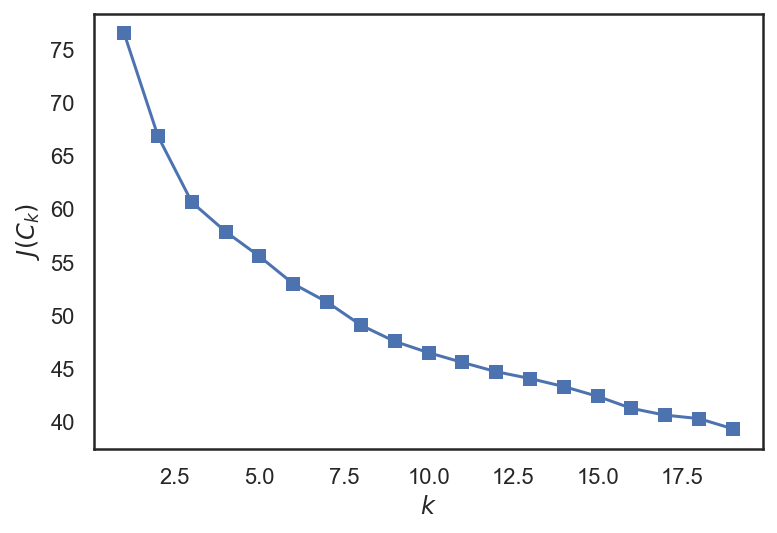

In [15]:
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_norm)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 20), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

* similar result

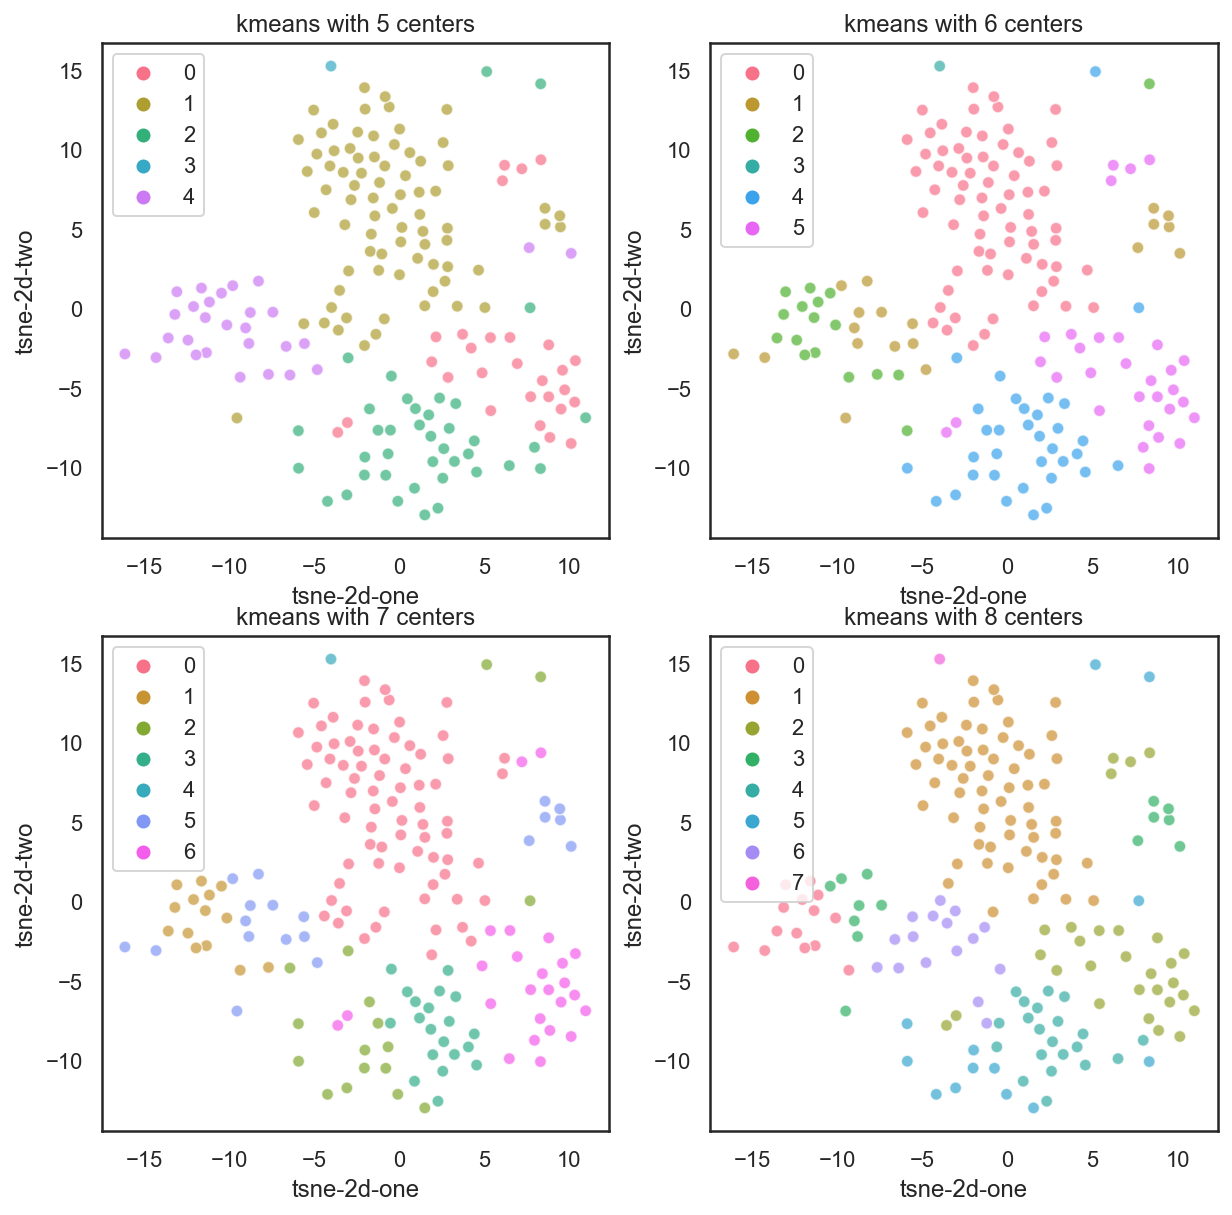

In [16]:


fig, axes = plt.subplots(2, 2,figsize=(10,10))
for i in range(5,9):
    y_pred= KMeans(n_clusters=i, random_state=170,max_iter=2000).fit_predict(X_norm)
    
    ax = axes[int((i-5)/2), (i-5)%2]
    #ny_train[col].plot(kind='hist', ax=ax)
    ax.set_title(f'kmeans with {i} centers')  
    sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue=y_pred,palette=sns.color_palette("husl",i),
                   data = df_subset,legend='full',alpha=0.7,ax=ax)
    #plt.title(f'kmeans with {i} centers')
plt.show()

### k-medoids

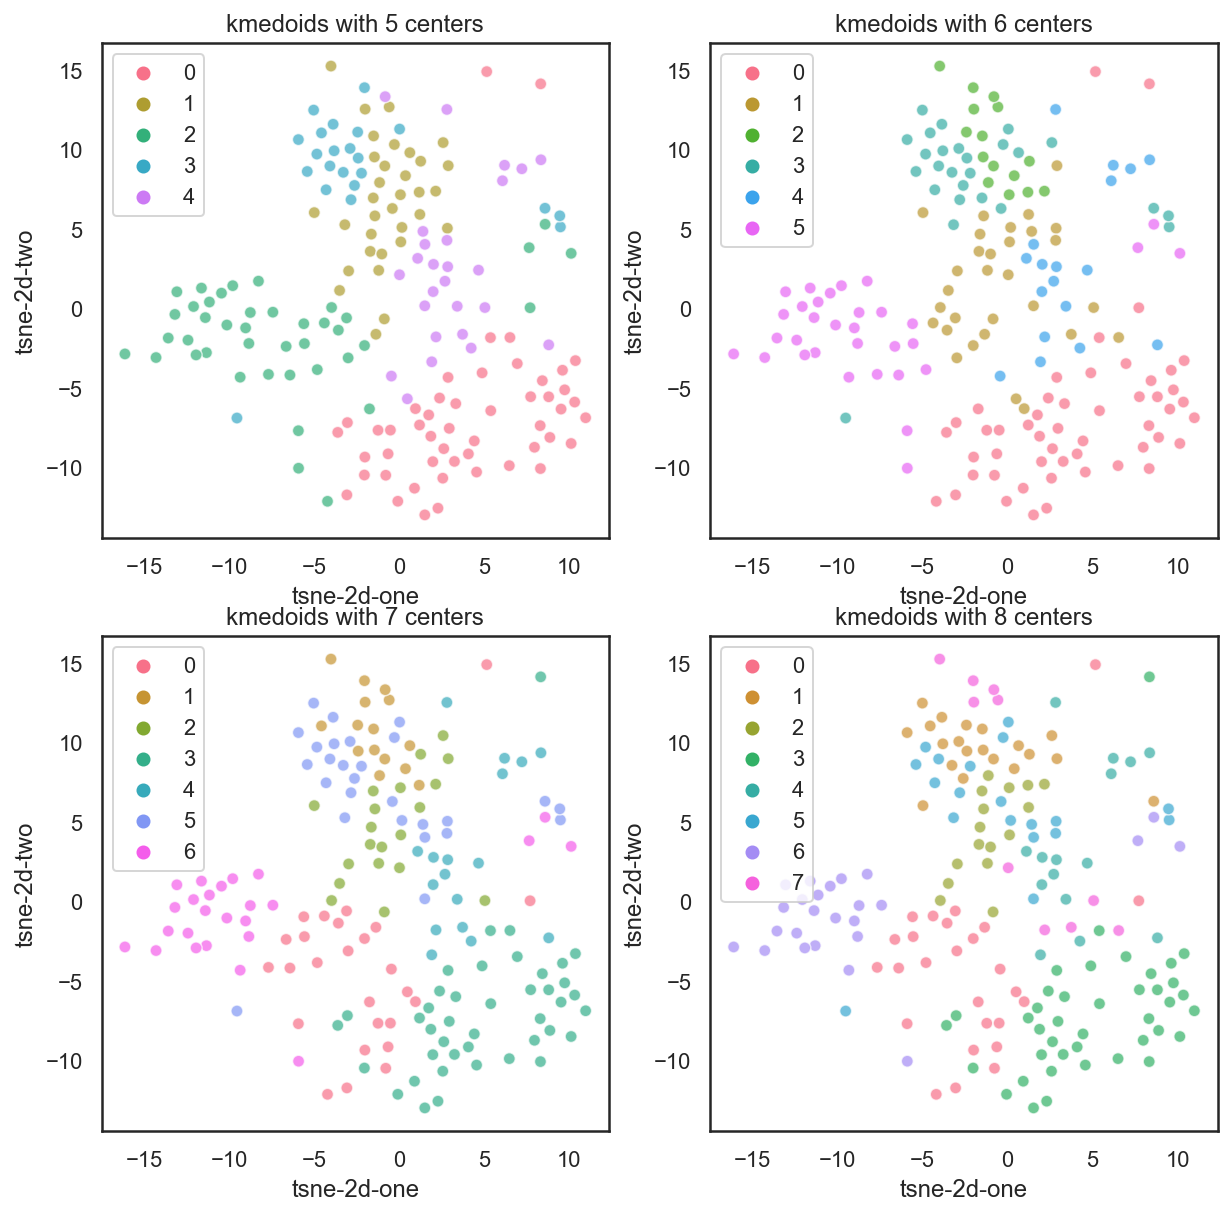

In [17]:
from sklearn_extra.cluster import KMedoids
fig, axes = plt.subplots(2, 2,figsize=(10,10))
for i in range(5,9):
    y_pred= KMedoids(n_clusters=i, random_state=170,max_iter=2000).fit_predict(X_reduced2)
    
    ax = axes[int((i-5)/2), (i-5)%2]
    #ny_train[col].plot(kind='hist', ax=ax)
    ax.set_title(f'kmedoids with {i} centers')  
    sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue=y_pred,palette=sns.color_palette("husl",i),
                   data = df_subset,legend='full',alpha=0.7,ax=ax)
    #plt.title(f'kmeans with {i} centers')
plt.show()

### Hierarchy clustering

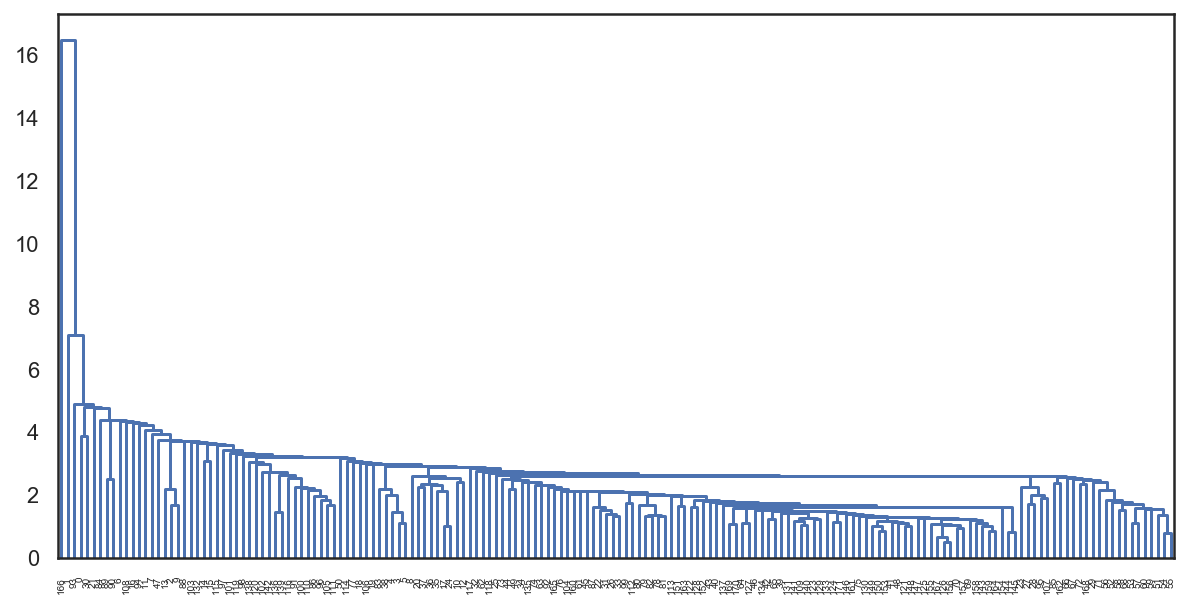

In [18]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
distance_mat = pdist(X_reduced2) 
# linkage — is an implementation if agglomerative algorithm
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.2)

* hierarchy clustering result not good

### Mean-Shift Clustering

number of estimated clusters : 5


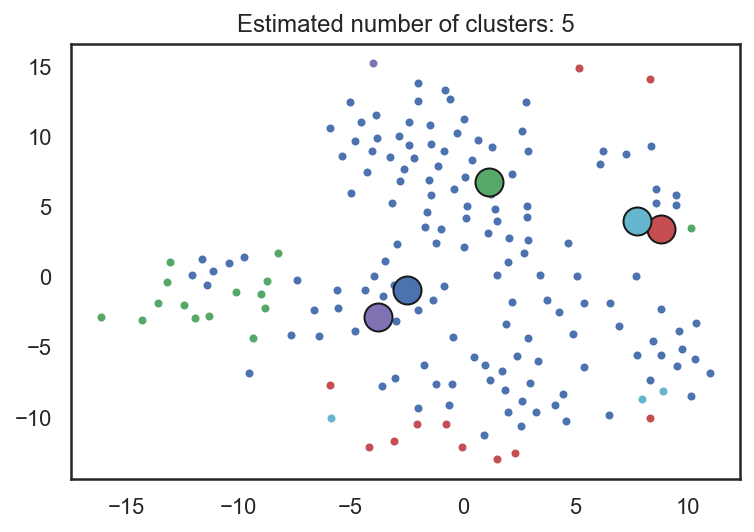

In [19]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X_reduced2, quantile=0.15)

ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(X_reduced2)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(df_subset.loc[my_members, 'tsne-2d-one'], df_subset.loc[my_members, 'tsne-2d-two'], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### DBSCAN

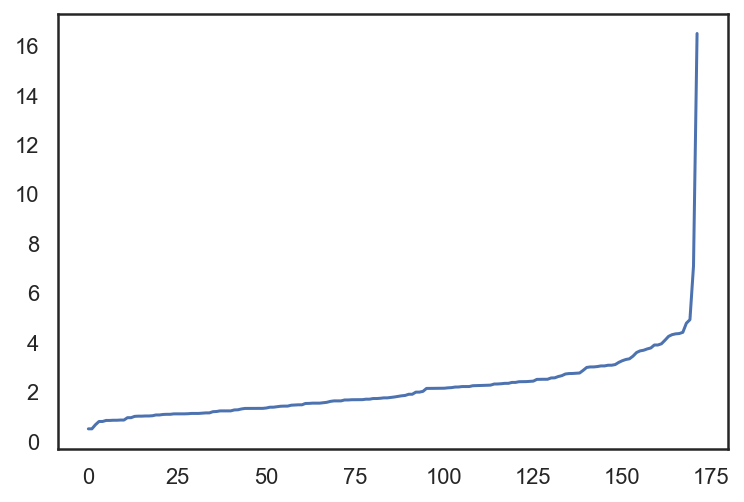

In [20]:
#find the optiaml eps
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_reduced2)
distances, indices = nbrs.kneighbors(X_reduced2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Estimated number of clusters: 3
Estimated number of noise points: 40
Silhouette Coefficient: 0.111


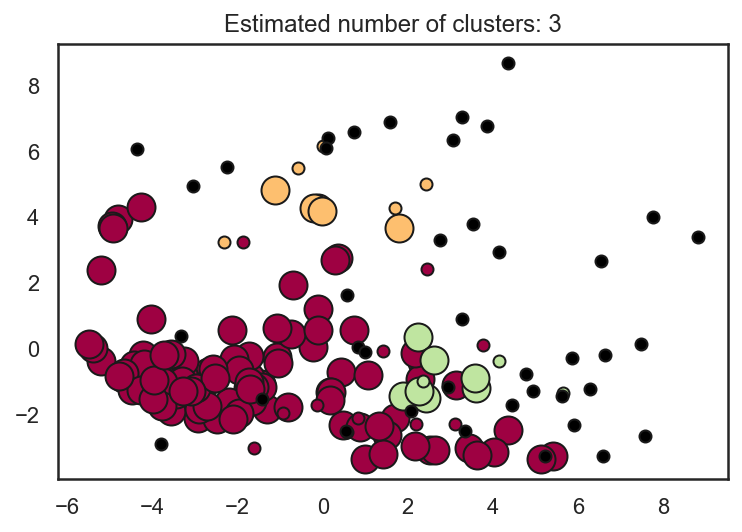

In [21]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=3).fit(X_reduced2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels,
#                                            average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_norm, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    xy = X_reduced2[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_reduced2[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

/Users/maggie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


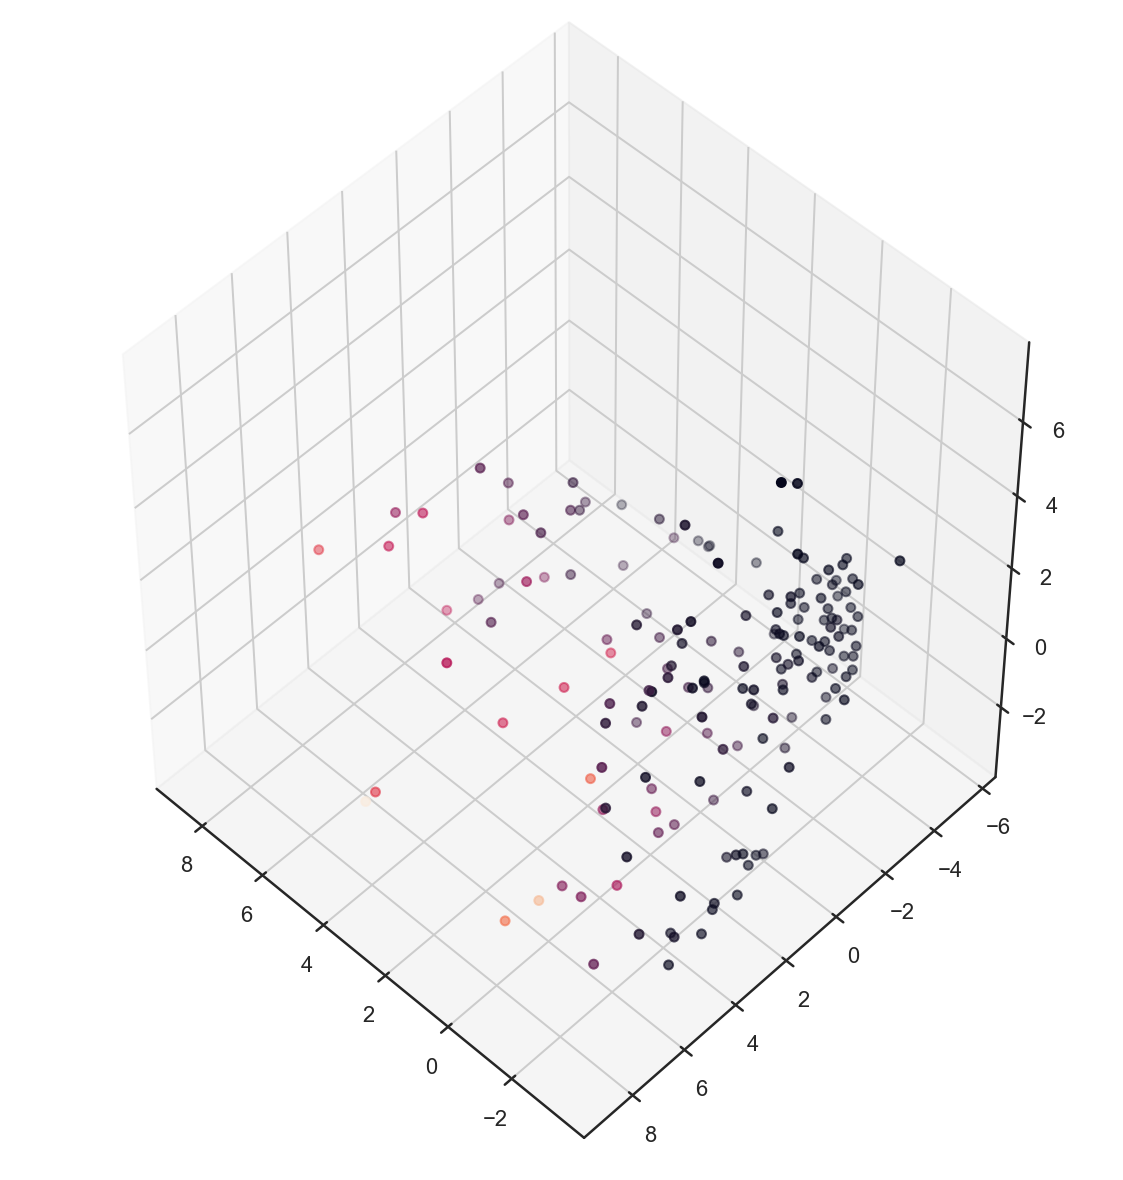

In [22]:
fignum = 1
fig = plt.figure(fignum, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X_reduced2[:, 1], X_reduced2[:, 0], X_reduced2[:, 2], c=y)
fig.show()

DBSCAN denote too much noise points

### EM

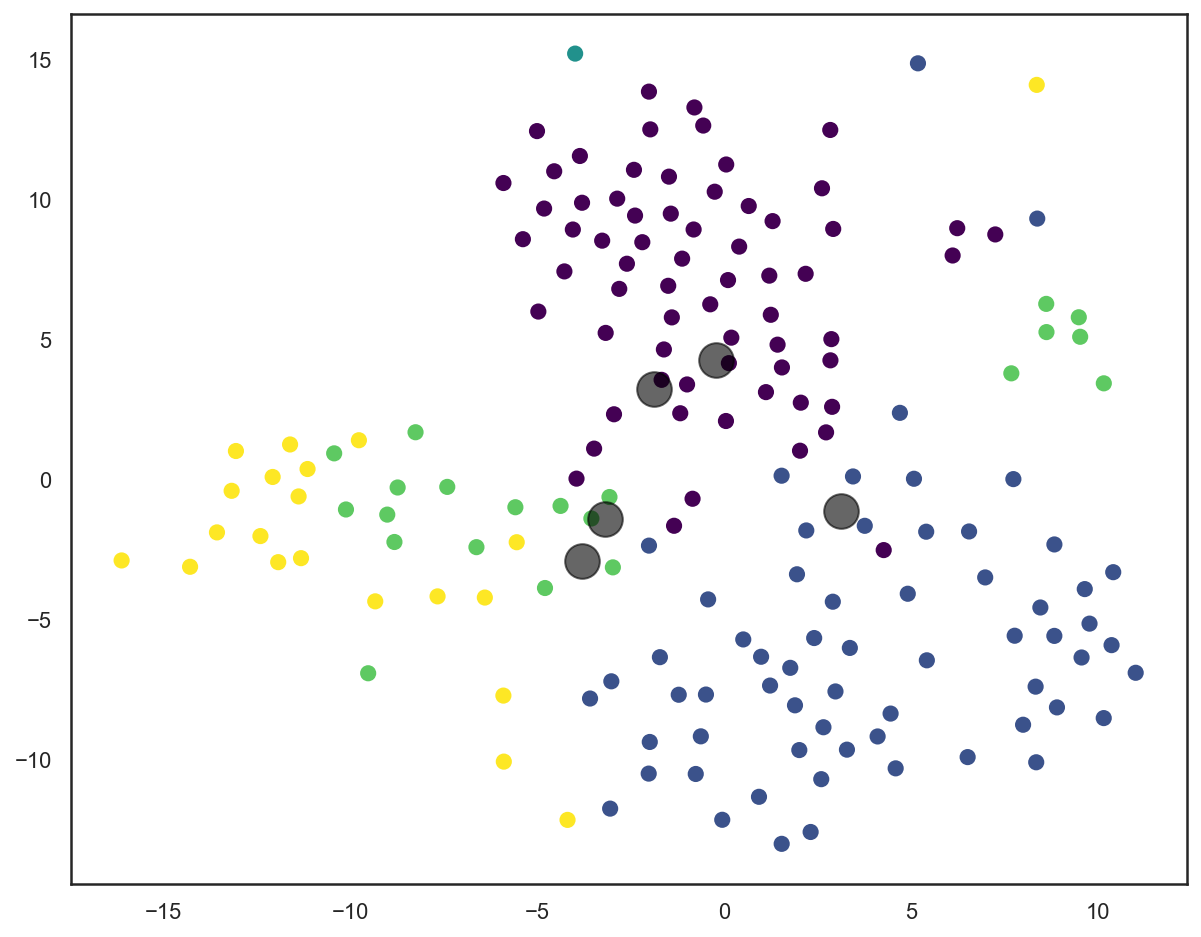

In [23]:
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal as mvn
#sklearn_pca = PCA(n_components = 2)
#Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
gmm = GaussianMixture(n_components=5, covariance_type='full').fit(X_reduced2)
prediction_gmm = gmm.predict(X_reduced2)
probs = gmm.predict_proba(X_reduced2)

centers = np.zeros((5,2))
for i in range(5):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(X_reduced2)
    centers[i, :] = X_reduced2[np.argmax(density)][0:2,]

plt.figure(figsize = (10,8))
plt.scatter(df_subset['tsne-2d-one'],df_subset['tsne-2d-two'],c=prediction_gmm ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

#### Conclusion:  Use K-means to clustering 



## Model with three cities

In [24]:
bos = pd.read_csv('zipcode_level_data/bos_model_final.csv')
dc = pd.read_csv('zipcode_level_data/dc_model_final.csv')

In [25]:
total = pd.concat([ny,bos,dc],axis=0,sort=False)

In [26]:
X = total.drop(columns='zipcode').fillna(0)

In [27]:
X_norm = preprocessing.scale(X)
X_centered = X_norm - X_norm.mean(axis=0)
pca = decomposition.PCA(n_components=10).fit(X_centered)
X_pca = pca.transform(X_centered)

In [28]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_norm)
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 241 samples in 0.000s...
[t-SNE] Computed neighbors for 241 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 241 / 241
[t-SNE] Mean sigma: 2.361522
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.084385
[t-SNE] KL divergence after 300 iterations: 0.604941


#### K-means

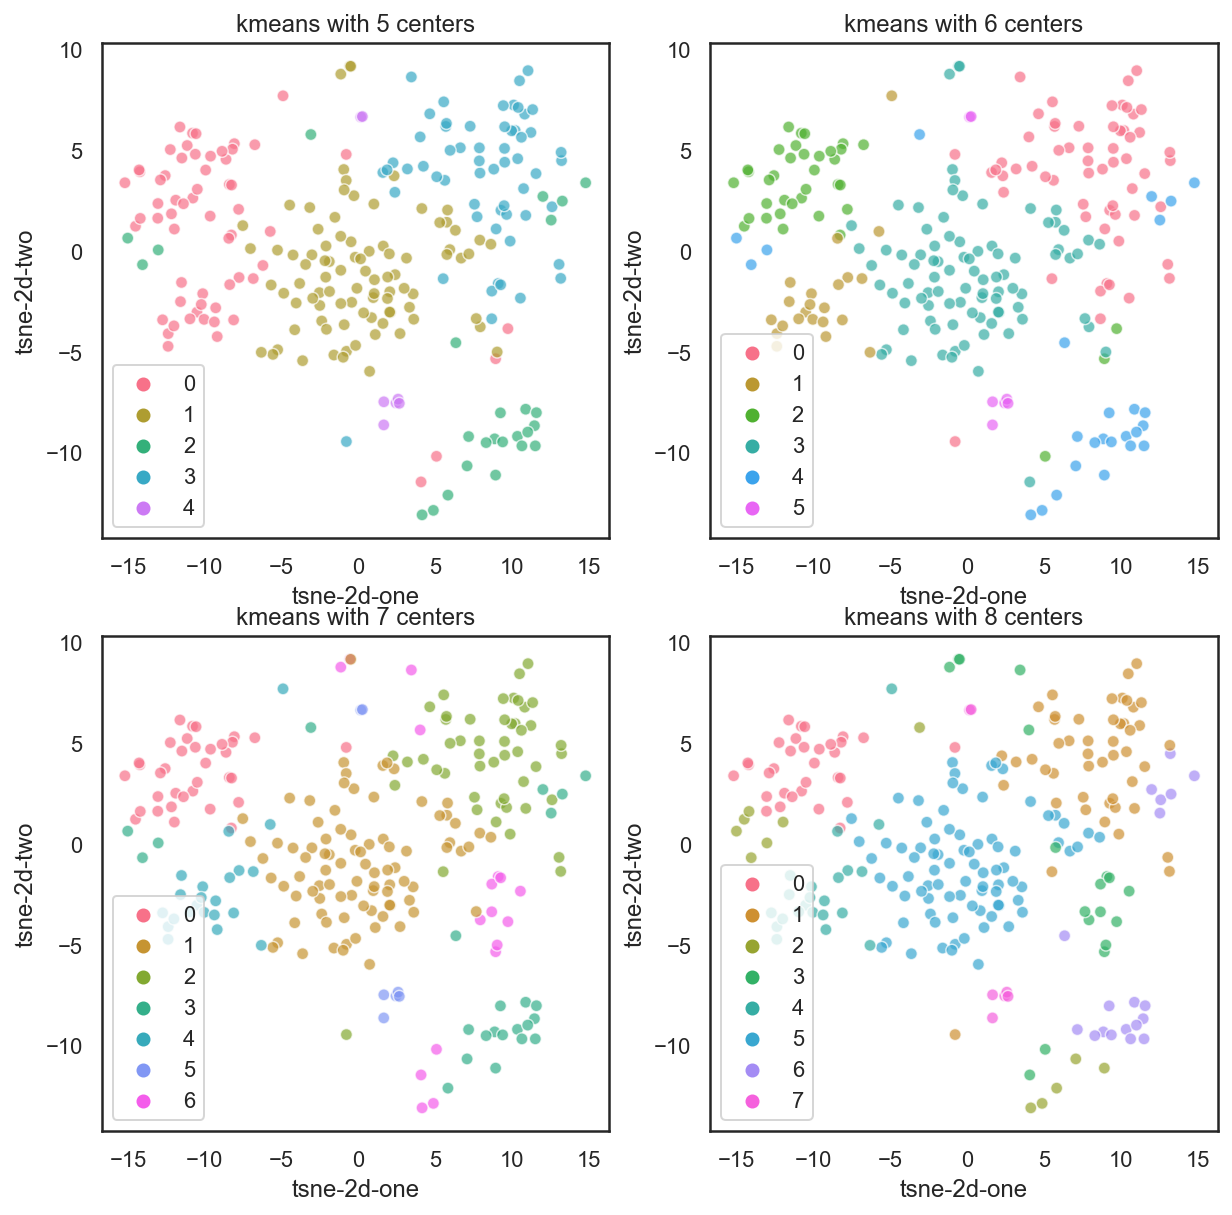

In [29]:
fig, axes = plt.subplots(2, 2,figsize=(10,10))
for i in range(5,9):
    y_pred= KMeans(n_clusters=i, random_state=170,max_iter=2000).fit_predict(X_pca)
    
    ax = axes[int((i-5)/2), (i-5)%2]
    #ny_train[col].plot(kind='hist', ax=ax)
    ax.set_title(f'kmeans with {i} centers')  
   
    sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue=y_pred,palette=sns.color_palette("husl",i),
                   data = df_subset,legend='full',alpha=0.7,ax=ax)

    #plt.title(f'kmeans with {i} centers')
plt.show()

Text(0, 0.5, '$J(C_k)$')

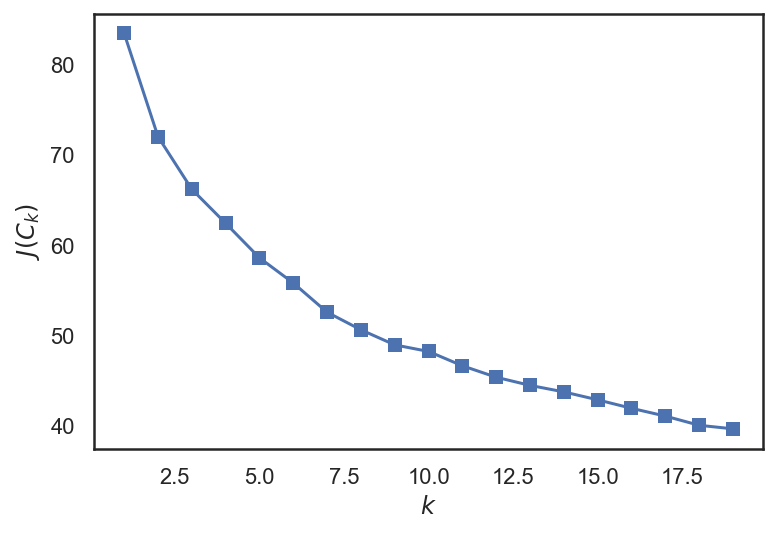

In [30]:
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 20), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

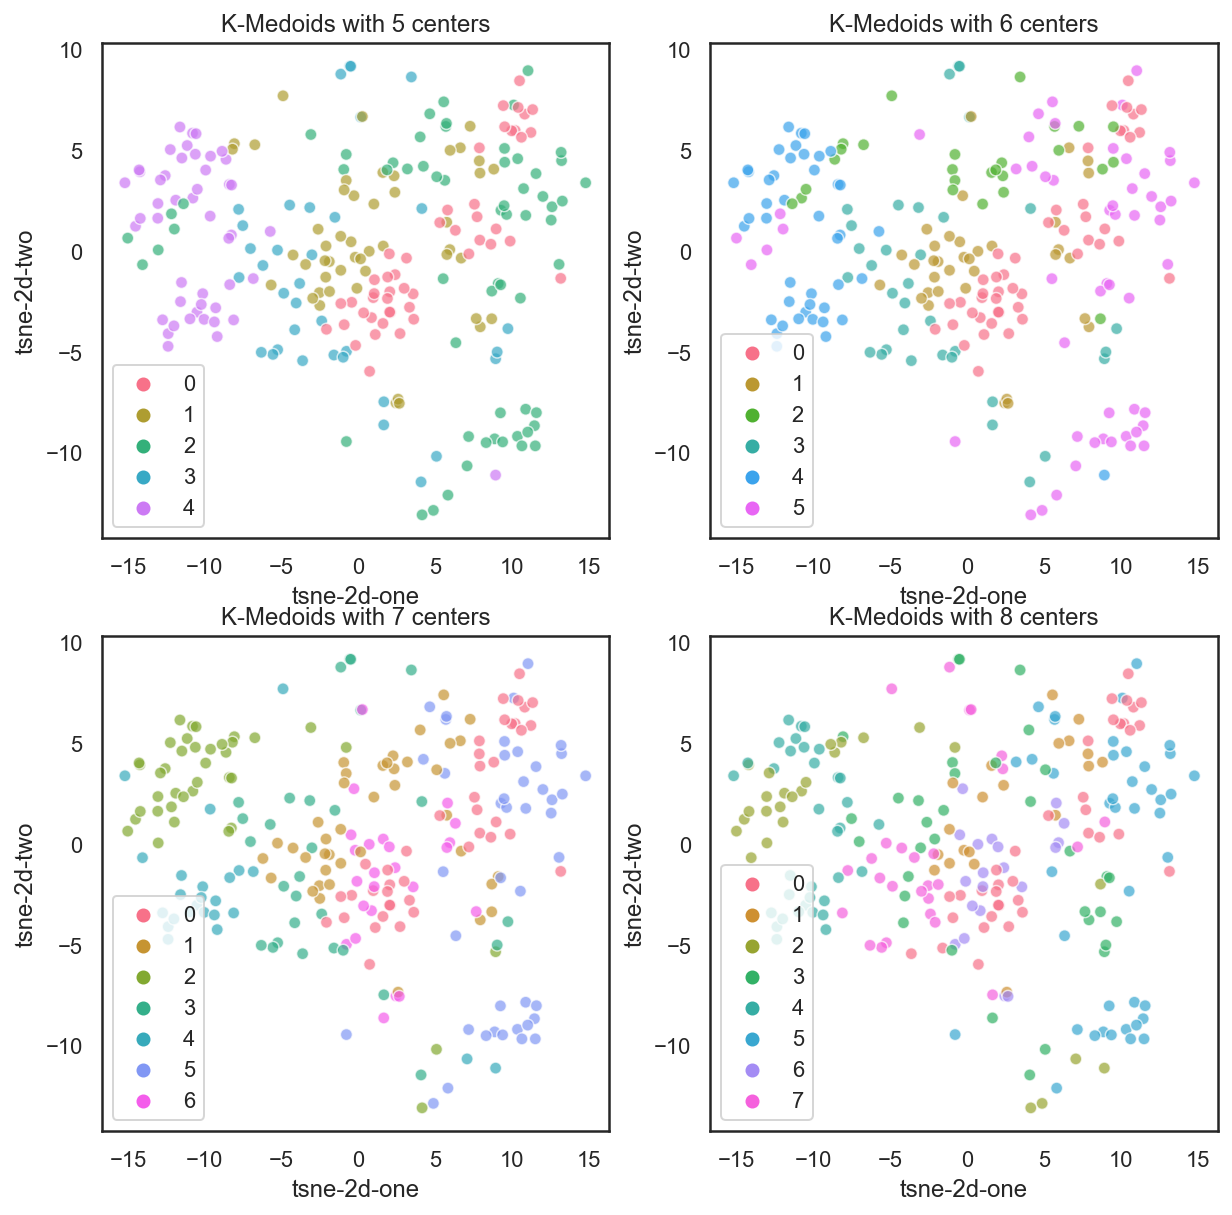

In [31]:
fig, axes = plt.subplots(2, 2,figsize=(10,10))
for i in range(5,9):
    y_pred= KMedoids(n_clusters=i, random_state=170,max_iter=2000).fit_predict(X_pca)
    
    ax = axes[int((i-5)/2), (i-5)%2]
    #ny_train[col].plot(kind='hist', ax=ax)
    ax.set_title(f'K-Medoids with {i} centers')  
    sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue=y_pred,palette=sns.color_palette("husl",i),
                   data = df_subset,legend='full',alpha=0.7,ax=ax)

    #plt.title(f'kmeans with {i} centers')
plt.show()

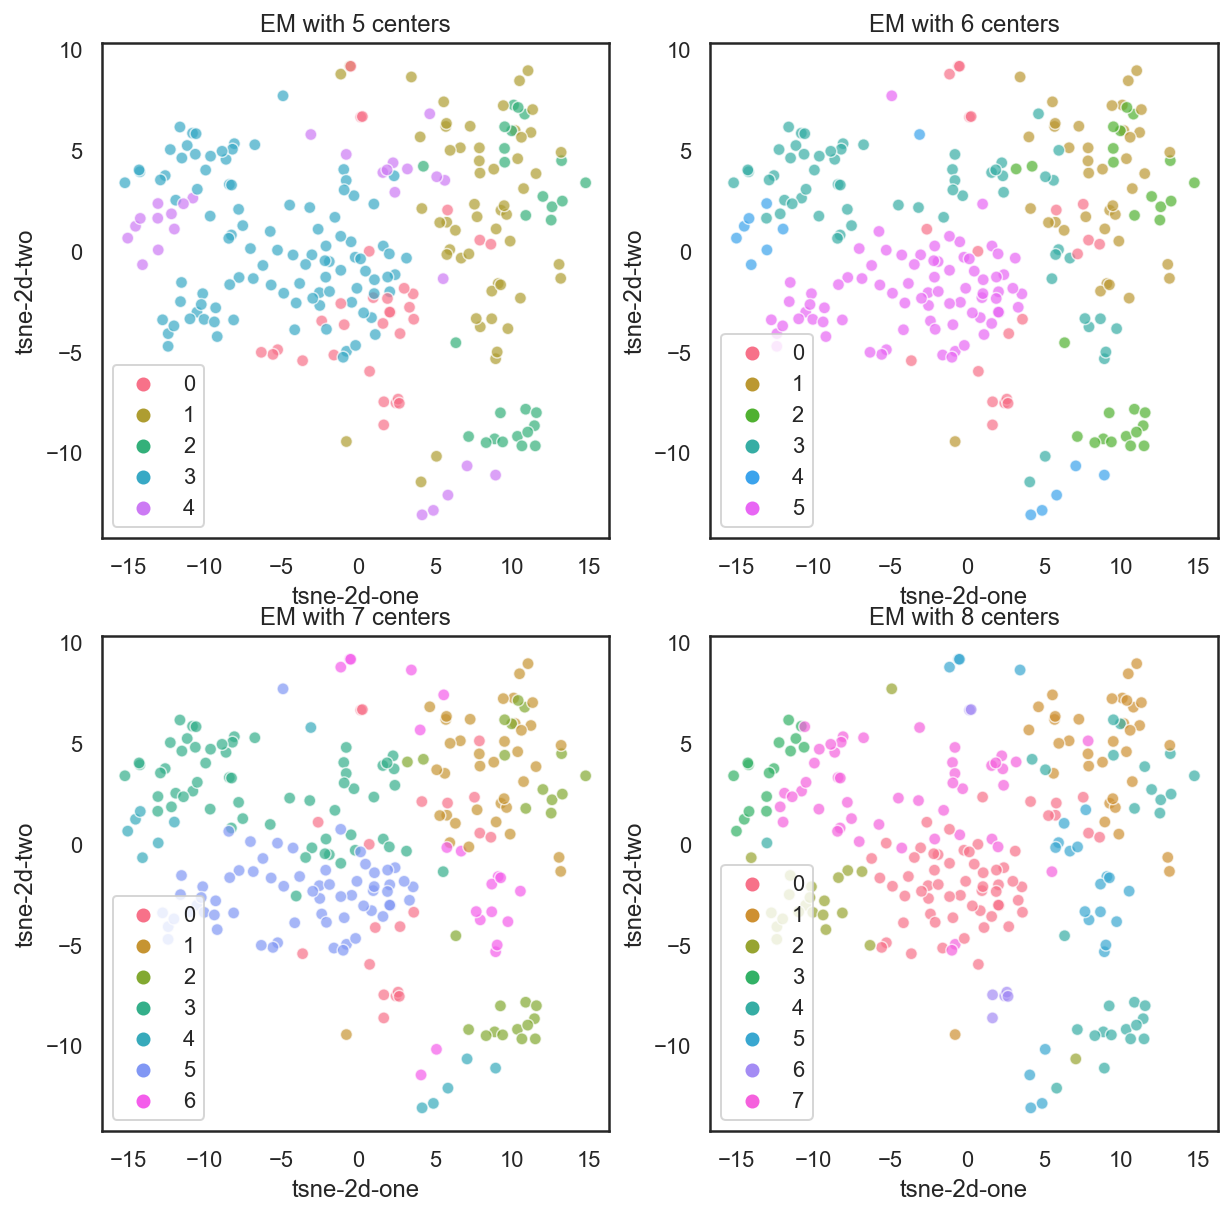

In [32]:
#gmm = GaussianMixture(n_components=5, covariance_type='full').fit(X_reduced2)
fig, axes = plt.subplots(2, 2,figsize=(10,10))
for i in range(5,9):
    y_pred= GaussianMixture(n_components=i, covariance_type='full', random_state=170,max_iter=2000).fit_predict(X_pca)
    
    ax = axes[int((i-5)/2), (i-5)%2]
    #ny_train[col].plot(kind='hist', ax=ax)
    ax.set_title(f'EM with {i} centers')  
    sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue=y_pred,palette=sns.color_palette("husl",i),
                   data = df_subset,legend='full',alpha=0.7,ax=ax)

    #plt.title(f'kmeans with {i} centers')
plt.show()

In [33]:
kmeans_pred = KMeans(n_clusters=6, random_state=170,max_iter=2000).fit_predict(X_pca)
#total['kmedoids_pred'] = kmedoids_pred
total['kmeans_pred'] = kmeans_pred
#total['em_pred'] = em_pred

In [34]:
# total.to_csv('3_cities_clustering_reslut.csv')

In [35]:
def fit_model(df,i):
    X = df.drop(columns='zipcode').fillna(0)    
    X_norm = preprocessing.scale(X)
    pca = decomposition.PCA(n_components=15)
    X_centered = X_norm - X_norm.mean(axis=0)
    pca.fit(X_centered)
    X_pca = pca.transform(X_centered)
    kmedoids_pred= KMedoids(n_clusters=i, random_state=170,max_iter=2000).fit_predict(X_pca)
    kmeans_pred= KMeans(n_clusters=i, random_state=170,max_iter=2000).fit_predict(X_pca)
    em_pred= GaussianMixture(n_components=i, covariance_type='full', random_state=170,max_iter=2000).fit_predict(X_pca)
    df['kmedoids_pred'] = kmedoids_pred
    df['kmeans_pred'] = kmeans_pred
    df['em_pred'] = em_pred
    return df



In [36]:
bos_label = fit_model(bos,5)
dc_label = fit_model(dc,5)

In [37]:
# #ny.to_csv('zipcode_level_data/ny_clustering.csv')
# bos.to_csv('zipcode_level_data/bos_clustering.csv')
# dc.to_csv('zipcode_level_data/dc_clustering.csv')